In [1]:
# 설치하는 데 2~3분 정도의 시간이 소요됩니다.
!pip install -q langchain-nvidia-ai-endpoints langchain langchain-community langchain-core unstructured sentence_transformers faiss-cpu openai selenium pypdf pacmap plotly_express nbformat rank_bm25 kiwipiepy

## 📚 RAG

### RAG 정의
단순히 프롬프트를 작성하여 LLM이 항상 내가 원하는 작업을 수행할 수 있다면 좋겠지만, 현실은 그렇지 않습니다. 이럴 때, 선택할 수 있는 효과적인 방법은 프롬프트 일부에 '지식'을 제공하는 것입니다. 이렇게 제공된 지식을 컨텍스트라고 부르며, LLM이 주어진 작업을 수행하기 위해 필요한 정보를 제공합니다. 이 방법을 검색 증강 생성(Retrieval-Augmented Generation, RAG)이라고 합니다. RAG는 파인 튜닝을 하는 것보다 훨씬 적은 노력과 비용이 들어 많은 사람들이 선호하는 방법이며, RAG를 개선하기 위한 새로운 방법들이 빠르게 개발되고 있습니다.

RAG를 사용하면 지식의 격차, 사실적 오류, 그리고 잘못된 정보 생성(hallucination)과 같은 문제들을 줄일 수 있습니다. 특히, 지속적으로 변화하고 업데이트되는 정보가 필요한 분야나 특정한 응용 프로그램에서 RAG는 큰 장점을 가지게 됩니다. RAG의 뛰어난 점은 특정 작업이나 응용 프로그램에 맞추어 LLM을 다시 학습시킬 필요가 없다는 것입니다.

### RAG 구성 요소

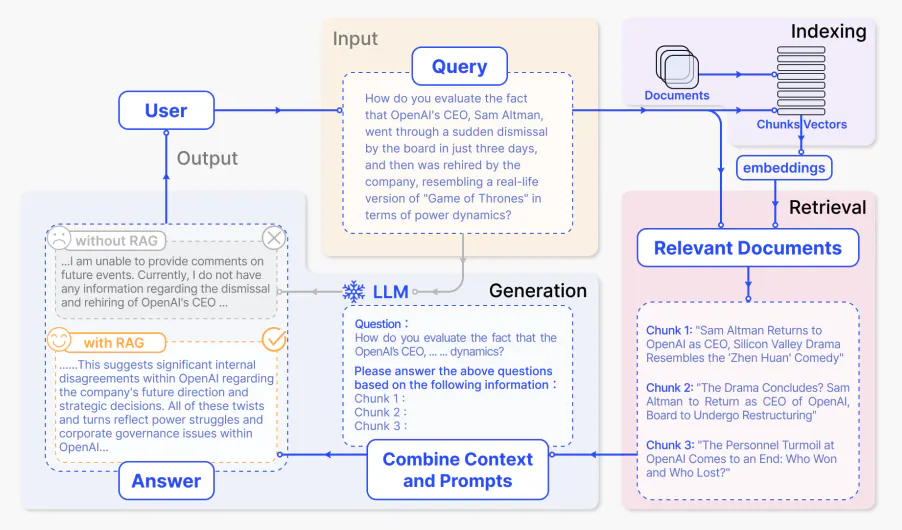

위 그림은 [Retrieval-Augmented Generation for Large
Language Models: A Survey](https://arxiv.org/pdf/2312.10997) 논문에서 RAG 프로세스의 대표적인 사례로 소개된 그림입니다.

#### 입력(Input)
LLM이 답변해야 할 질문을 의미합니다. RAG를 사용하지 않는 경우, LLM은 직접 질문에 대답할 것입니다.

> Query: OpenAI의 CEO인 샘 알트먼이 단 3일 만에 이사회에 의해 갑작스럽게 해임되고, 이후 회사에 의해 다시 고용된 사실을 어떻게 평가하십니까? 이는 power dynamics 측면에서 "왕좌의 게임"과 유사합니다.

#### 인덱싱(Indexing)
RAG를 사용하려면 먼저 문서들을 작은 단위(청크)로 나눕니다. 그런 다음 각 청크를 벡터로 변환하는데, 이를 임베딩이라고 부릅니다. 이렇게 생성된 임베딩은 벡터 데이터베이스에 저장됩니다.

#### 검색(Retrieval)
질문이 주어지면, 의미론적 유사성을 기반으로 질문과 가장 관련성이 높은 상위 k개의 청크를 검색합니다. 이렇게 검색된 청크를 '관련 문서'라고 합니다.

>- 청크 1: "샘 알트먼, OpenAI CEO로 복귀, 실리콘밸리 코미디 드라마와 유사"
- 청크 2: "드라마의 결말? 샘 알트먼, OpenAI CEO로 복귀, 이사회 구조 조정 예정"
- 청크 3: "OpenAI의 인사 혼란이 끝나다: 누가 이겼고 누가 졌는가?"

#### 생성(Generation)
검색된 문서 청크는 원래의 질문과 결합되어 추가 컨텍스트를 형성합니다. 이 결합된 텍스트와 질문은 모델에 입력되어 최종 답변을 생성하는 데 사용됩니다.

> without RAG: 나는 미래의 사건에 대해 언급할 수 없습니다. 현재 OpenAI의 CEO 해임 및 재임용에 대한 정보가 없습니다.

> with RAG: 이는 OpenAI 내에서 회사의 미래 방향과 전략적 결정에 대한 중요한 내부 의견 불일치를 시사합니다. 이 모든 우여곡절은 OpenAI 내의 권력 다툼과 기업 지배 구조 문제를 반영합니다.

제공된 예시에서, 모델만을 사용했을 때 현재 사건에 대한 지식 부족으로 질문에 응답하지 못하였습니다. 반면, RAG를 사용할 때 시스템은 모델이 질문에 적절하게 대답할 수 있도록 필요한 정보를 제공해주었습니다. 🌟

### RAG 좋기만 할까? 생각보다 할 게 많은 RAG

RAG는 파인 튜닝에 비해 쉽게 만들 수 있다고 알려져 있습니다. 하려는 작업에 따라 그럴 수도 있고, 아닐 수도 있습니다. RAG를 잘하려면 생각보다 고려할게 많습니다.

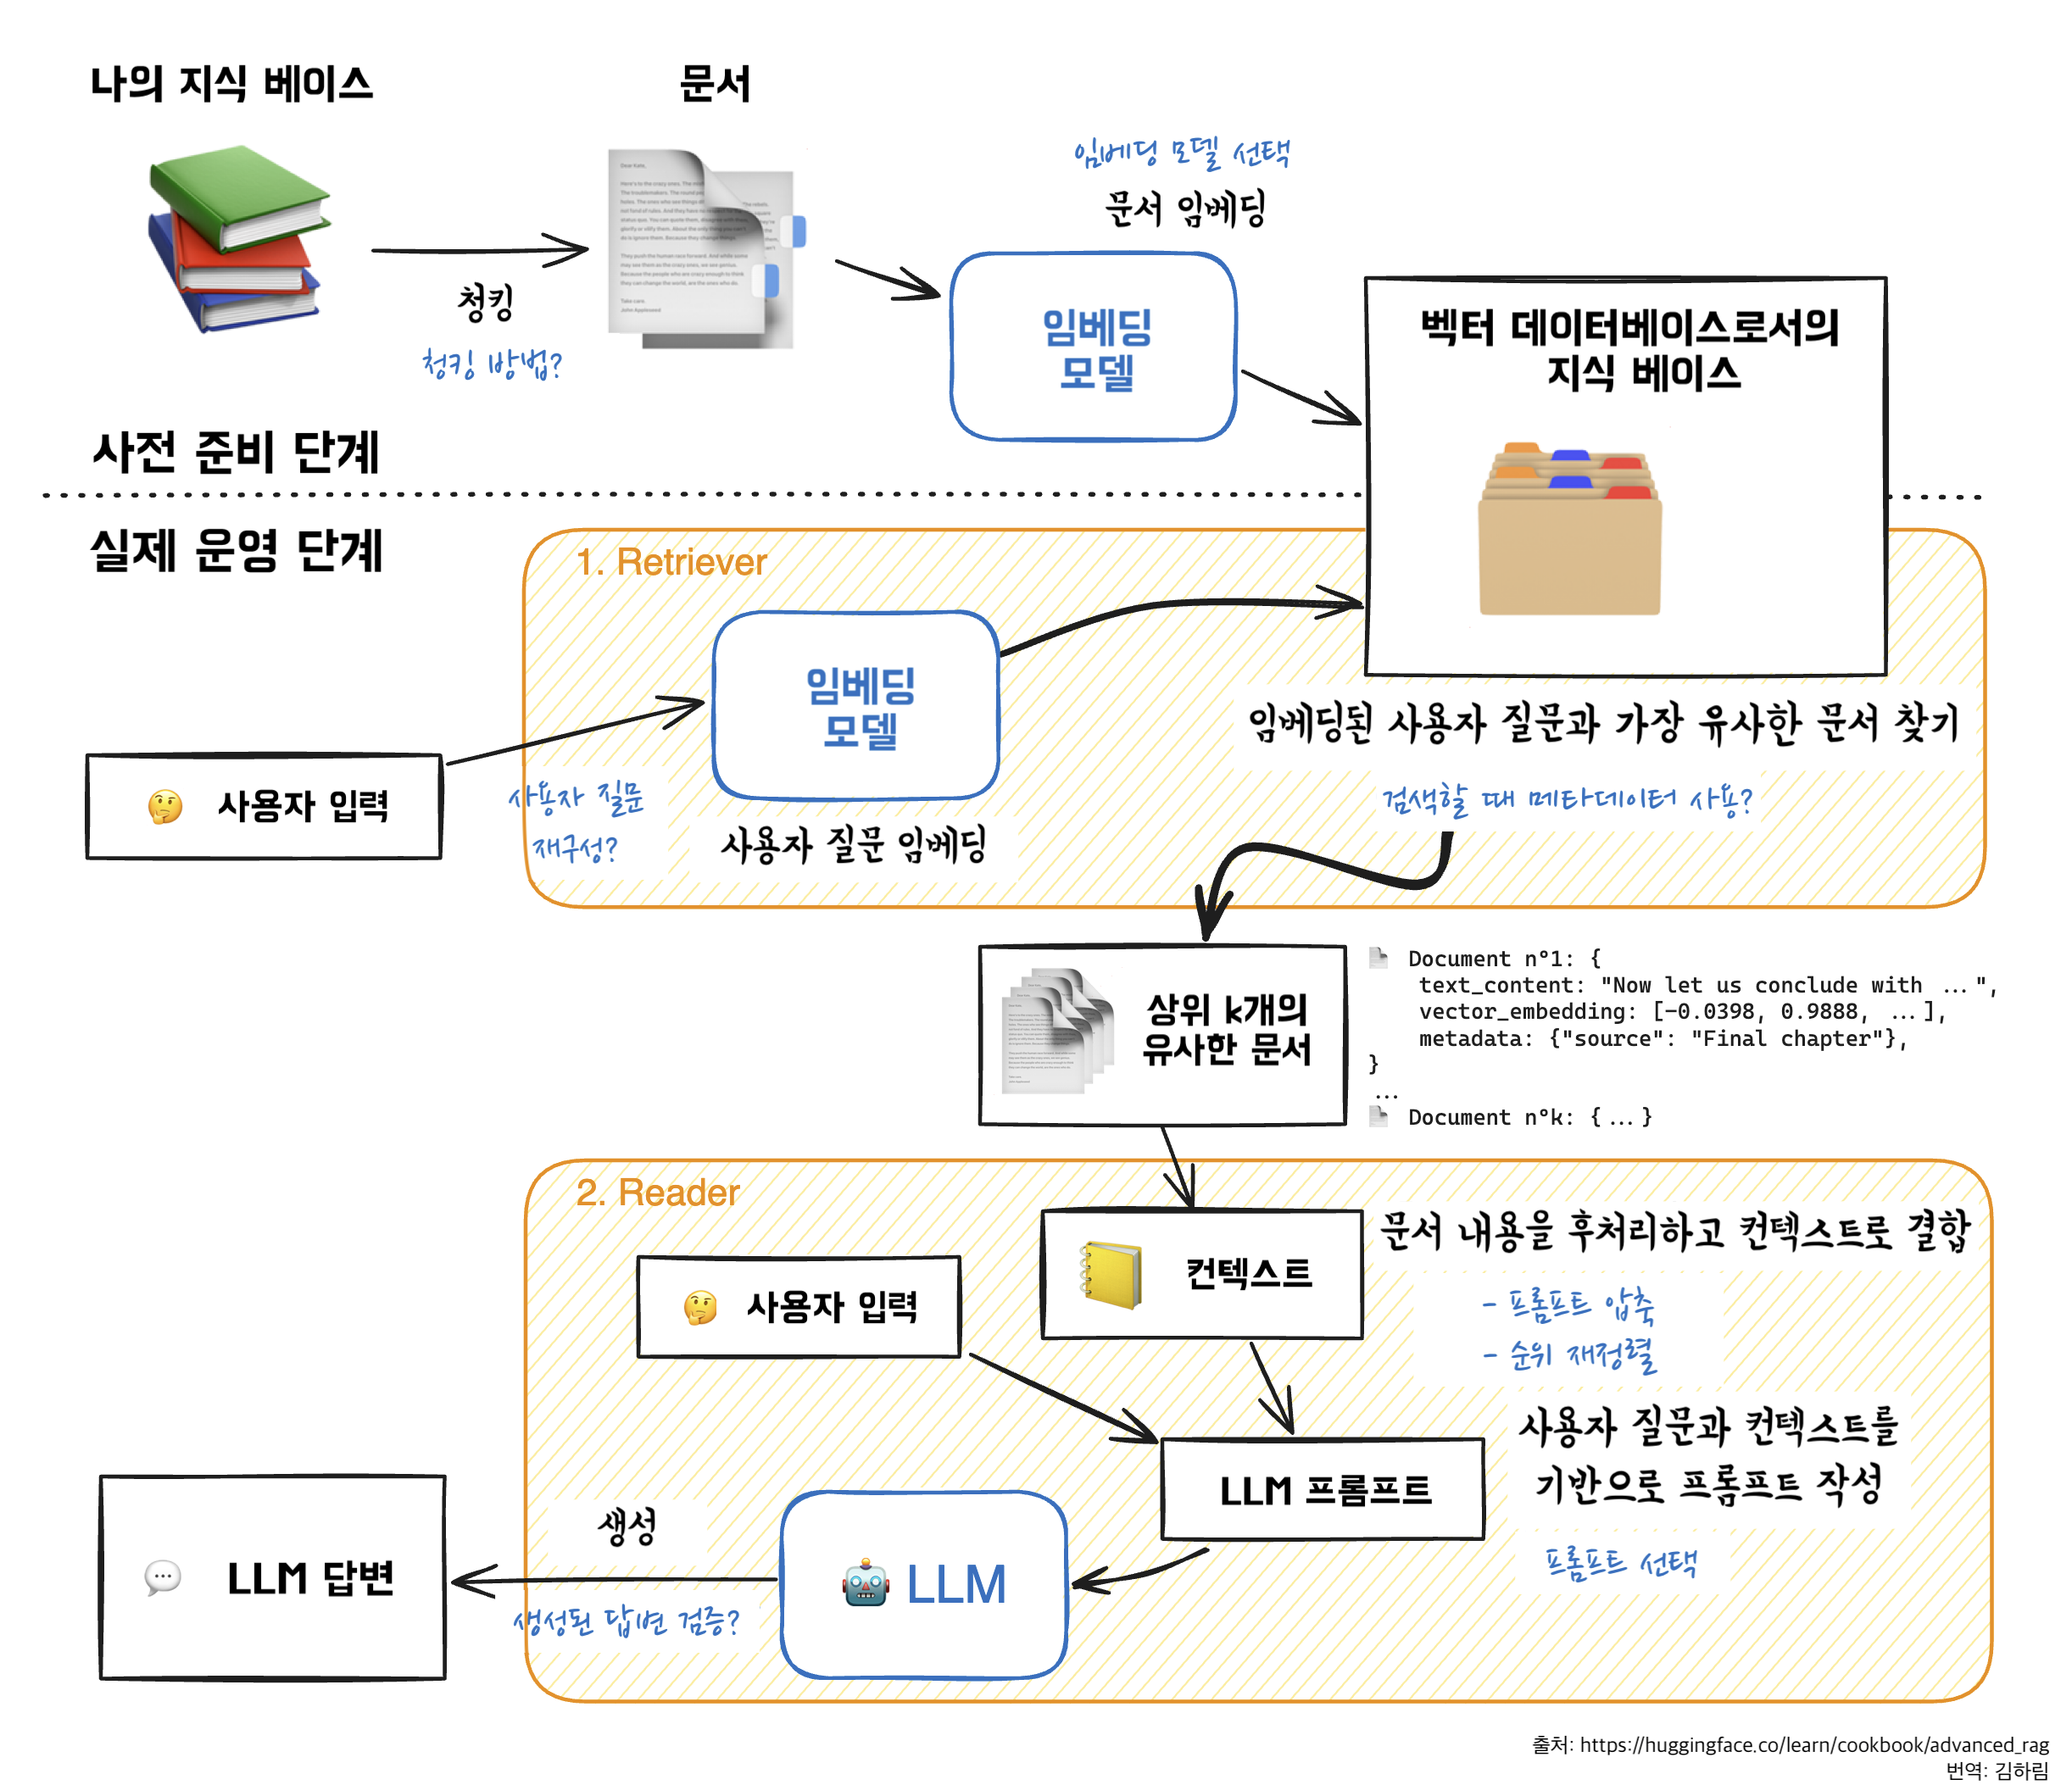

### RAG의 종류

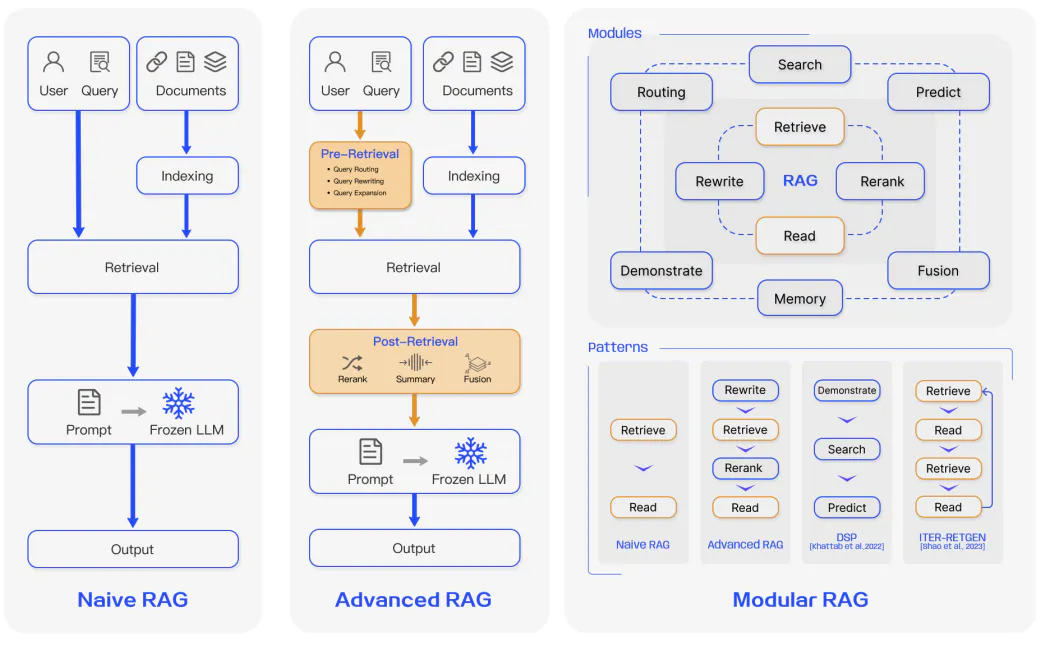

## Advanced Retriever 기법

- [How to: use a vector store to retrieve data](https://python.langchain.com/docs/how_to/vectorstore_retriever/)
- [How to: generate multiple queries to retrieve data for](https://python.langchain.com/docs/how_to/MultiQueryRetriever/)
- [How to: use contextual compression to compress the data retrieved](https://python.langchain.com/docs/how_to/contextual_compression/)
- [How to: write a custom retriever class](https://python.langchain.com/docs/how_to/custom_retriever/)
- [How to: add similarity scores to retriever results](https://python.langchain.com/docs/how_to/add_scores_retriever/)
- [How to: combine the results from multiple retrievers](https://python.langchain.com/docs/how_to/ensemble_retriever/)
- [How to: reorder retrieved results to mitigate the "lost in the middle" effect](https://python.langchain.com/docs/how_to/long_context_reorder/)
- [How to: generate multiple embeddings per document](https://python.langchain.com/docs/how_to/multi_vector/)
- [How to: retrieve the whole document for a chunk](https://python.langchain.com/docs/how_to/parent_document_retriever/)
- [How to: generate metadata filters](https://python.langchain.com/docs/how_to/self_query/)
- [How to: create a time-weighted retriever](https://python.langchain.com/docs/how_to/time_weighted_vectorstore/)
- [How to: use hybrid vector and keyword retrieval](https://python.langchain.com/docs/how_to/hybrid/)

### ☘️ [Multi-Query Retriever](https://python.langchain.com/docs/how_to/MultiQueryRetriever/)

MultiQueryRetriever는 LLM을 활용하여 사용자가 입력한 쿼리에 대해 다양한 관점으로 여러 쿼리를 자동으로 생성합니다. 이렇게 생성된 각 쿼리마다 관련된 문서 집합을 검색한 후, 모든 쿼리의 결과를 하나로 합쳐 보다 큰 관련 문서 집합을 만듭니다. 이를 통해 같은 질문에 대해 다양한 관점을 반영할 수 있어, 거리 기반 검색의 한계를 보완하고 더욱 풍부한 검색 결과를 얻을 수 있습니다.

```
multi_query_retriever.invoke("트랜스포머?")
```

*output*
```
1. 인공지능 언어 모델로서, 트랜스포머 아키텍처의 주요 특징과 이점에 대해 설명해 주실 수 있나요?
2. 자연어 처리 작업에서 트랜스포머 기반 모델이 가지는 장점들은 무엇이며, 기존 방법들과 어떻게 차별화되나요?
3. 트랜스포머 아키텍처가 다양한 언어 이해 및 생성 작업에 미치는 영향과 응용 사례는 무엇인가요?
```

In [55]:
NIM_API_KEY=""
NIM_EMBEDDING_MODEL="nvidia/llama-3.2-nv-embedqa-1b-v2"
NIM_INFERENCE_MODEL="meta/llama-3.1-8b-instruct"
NIM_RERANKING_MODEL="nvidia/llama-3.2-nv-rerankqa-1b-v2"

In [3]:
from langchain import PromptTemplate

template = """
    <s>[INST] 당신은 QA(Question-Answering)을 수행하는 Assistant입니다. 다음의 Context를 이용하여 Question에 답변하세요.
    최소 3문장 최대 5문장으로 답변하세요.
    주어진 Context가 없다면 "정보가 부족하여 답변할 수 없습니다."를 출력하세요.
    Context: {context}
    Question: {question} [/INST]
    Answer:
    """

# Added prompt template
prompt = PromptTemplate(
    input_variables=["context", "question"],
    template=template
)

prompt.pretty_print()


    <s>[INST] 당신은 QA(Question-Answering)을 수행하는 Assistant입니다. 다음의 Context를 이용하여 Question에 답변하세요.
    최소 3문장 최대 5문장으로 답변하세요.
    주어진 Context가 없다면 "정보가 부족하여 답변할 수 없습니다."를 출력하세요.
    Context: {context}
    Question: {question} [/INST]
    Answer:
    


In [ ]:
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain_nvidia_ai_endpoints import NVIDIAEmbeddings, ChatNVIDIA
import logging

logging.basicConfig(filename='multi_query.log', level=logging.INFO)
logging.getLogger("langchain.retrievers.multi_query").setLevel(logging.INFO)

embedding_model = NVIDIAEmbeddings(
  model=NIM_EMBEDDING_MODEL, 
  api_key=NIM_API_KEY, 
  truncate="NONE", 
  )

inference_model = ChatNVIDIA(
  model=NIM_INFERENCE_MODEL,
  api_key=NIM_API_KEY, 
  temperature=0.2,
  top_p=0.7,
  max_tokens=512,
)

def format_docs(docs):
    print(docs)
    return "\n\n".join(doc.page_content for doc in docs)

In [5]:
from langchain.schema import Document
from langchain_community.vectorstores import FAISS


restaurants = [
    "후추스시톡톡초밥은 롤 카테고리에 속하며 '일본에서 먹던 그 맛입니다'라는 설명이 있습니다. 광고 표시가 있고 현재 영업 중이며 601개의 리뷰가 있습니다. '신선한 회와 맛있는 초밥의 조화'가 특징입니다.",
    "세광양대창 서울대입구점은 예약 가능한 곱창, 막창, 양 전문점으로 '양대창, 곱창, 막창 숯불구이'를 제공합니다. 광고 표시가 있고 현재 영업 중이며 별점 4.47에 999개 이상의 리뷰가 있습니다.",
    "볏짚구이이야기 서울대입구역본점은 장어, 먹장어요리 전문점으로 현재 영업 중입니다. 별점 4.54에 980개의 리뷰가 있으며 TV프로그램 '맛있는녀석들'에 소개되었습니다.",
    "동경산책 서울대입구점은 일식당으로 현재 영업 중입니다. 별점 4.49에 999개 이상의 리뷰가 있습니다.",
    "쥬벤쿠바 서울대입구점은 예약 가능한 양식 레스토랑으로 현재 영업 중입니다. 별점 4.68에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.",
    "채우동은 예약 가능한 우동, 소바 전문점으로 톡톡쿠폰이 있습니다. '알림받기 하면 치킨가라아게 3p 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.87에 999개 이상의 리뷰가 있습니다.",
    "문득은 이탈리아음식점으로 현재 영업 중입니다. 별점 4.5에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.",
    "더 다이닝 로아는 예약 가능한 양식 레스토랑으로 톡톡쿠폰이 있습니다. '에이드or주류(택1)1잔무료 쿠폰'을 제공하며 현재 영업 중입니다. 999개 이상의 리뷰가 있고 서울 관악구 봉천동에 위치해 있습니다.",
    "스테이크하우스 로아는 예약 가능한 양식 레스토랑으로 톡톡쿠폰이 있습니다. '에이드or하우스와인1잔무료! 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.66에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.",
    "빽돈 본점은 예약 가능한 돼지고기구이 전문점으로 톡톡쿠폰이 있습니다. '알림받기 하면 하이볼무료! 저장+알림받기! 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.53에 999개 이상의 리뷰가 있습니다.",
    "십원집 봉천점은 예약 가능한 돼지고기구이 전문점으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 별점 4.48에 999개 이상의 리뷰가 있습니다.",
    "피자네버슬립스 샤로수길점은 피자 전문점으로 현재 영업 중입니다. 별점 4.48에 999개 이상의 리뷰가 있습니다.",
    "킷사서울은 일식당으로 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 TV프로그램 '줄서는식당'에 소개되었습니다.",
    "와인창고잡은 예약 가능한 와인바로 톡톡쿠폰이 있습니다. '알림받기 하면 크림치즈크래커 무료 쿠폰'을 제공하며 현재 영업 전입니다. 별점 4.4에 999개 이상의 리뷰가 있습니다.",
    "우양간은 예약 가능한 육류, 고기요리 전문점으로 톡톡쿠폰이 있습니다. '알림받기 하면 네이버 예약시 음료 쿠폰'을 제공하며 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 '맛있는 고기와 좋은 분위기의 만남'이 특징입니다.",
    "쟝블랑제리 낙성대본점은 네이버페이 결제 가능한 베이커리로 현재 영업 중입니다. 별점 4.44에 999개 이상의 리뷰가 있으며 TV프로그램 '오늘N'에 소개되었습니다.",
    "815광복점 샤로수길본점은 육류, 고기요리 전문점으로 현재 영업 중입니다. 별점 4.45에 914개의 리뷰가 있습니다.",
    "박진주할머니김치곱창전골 서울대입구본점은 예약 가능한 곱창, 막창, 양 전문점으로 톡톡쿠폰이 있습니다. '알림받기 하면 구이주문시 불짜장or수제비 쿠폰'을 제공하며 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 '시원한 국물의 맛있는 곱창전골'이 특징입니다.",
    "제주국수임당 본점은 예약 가능한 한식 전문점으로 쿠폰이 있습니다. '첫방문시 음료1개 무료제공! 쿠폰'을 제공하며 현재 영업 중입니다. 870개의 리뷰가 있으며 '맛있는 고기 국수와 깔끔한 내부의 조화'가 특징입니다.",
    "텐동요츠야는 일식당으로 현재 영업 중입니다. 별점 4.35에 999개 이상의 리뷰가 있으며 TV프로그램 '2TV생생정보'에 소개되었습니다.",
    "서울도새지 서울대입구역점은 예약 가능한 육류, 고기요리 전문점으로 쿠폰이 있습니다. '네이버 예약시 음료수 1병 증정 쿠폰'을 제공하며 새로 오픈했고 현재 영업 중입니다. 213개의 리뷰가 있으며 '맛있는 고기와 풍성한 메뉴의 만남'이 특징입니다.",
    "연탄부락 낙성대점은 육류, 고기요리 전문점으로 현재 영업 중입니다. 별점 4.51에 999개 이상의 리뷰가 있으며 TV프로그램 '식객남녀잘먹었습니다'에 소개되었습니다.",
    "오아인은 네이버페이 결제 가능하고 예약 가능한 양식 레스토랑으로 톡톡 서비스를 제공합니다. '2만원대~ 가성비 와인샵'이라는 설명이 있고 광고 표시가 있습니다. 현재 영업 중이며 305개의 리뷰가 있고 '다양한 와인과 아름다운 인테리어의 조화'가 특징입니다.",
    "그물에걸리지않는바람처럼은 맥주, 호프 전문점으로 '생맥주가 맛있는 조용한 술집'이라는 설명이 있습니다. 광고 표시가 있고 현재 영업 전이며 별점 4.98에 287개의 리뷰가 있습니다.",
    "쭈앤쭈 서울대본점은 예약 가능한 주꾸미요리 전문점으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 별점 4.49에 999개 이상의 리뷰가 있고 TV프로그램 '생방송투데이'에 소개되었습니다.",
    "사담은 톡톡 서비스를 제공하는 브런치 전문점으로 현재 영업 중입니다. 별점 4.72에 999개 이상의 리뷰가 있습니다.",
    "오월의김밥은 김밥 전문점으로 현재 영업 종료되었습니다. 별점 4.54에 999개 이상의 리뷰가 있습니다.",
    "그집돼지 본점은 돼지고기구이 전문점으로 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 '맛있는 고기와 풍성한 반찬의 조화'가 특징입니다.",
    "파앤피파스타하우스 샤로수길점은 예약 가능한 이탈리아음식점으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 999개 이상의 리뷰가 있고 '좋은 분위기와 맛있는 파스타의 조화'가 특징입니다.",
    "안녕부산은 한식 전문점으로 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다."
    "복희떡볶이는 떡볶이 전문점으로 현재 영업 중입니다. 428개의 리뷰가 있으며 '감칠맛 풍부한 소스가 더해진 맛있는 즉석 떡볶이'가 특징입니다.",
    "황칠나라 풍년옥은 한식 전문점으로 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.",
    "구퉁이 서울대점은 예약 가능한 육류, 고기요리 전문점으로 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 '맛있는 고기와 푸짐한 반찬의 조화'가 특징입니다.",
    "고육정은 예약 가능한 육류, 고기요리 전문점으로 쿠폰이 있습니다. '네이버 예약시 네이버 예약시 계란찜 서비스 쿠폰'을 제공하며 현재 영업 중입니다. 179개의 리뷰가 있으며 '맛있는 밑반찬과 고기의 환상 조화'가 특징입니다.",
    "잔잔 샤로수길점은 예약 가능한 이자카야로 톡톡쿠폰이 있습니다. '공짜:)아벤트 참여 쿠폰'을 제공하며 곧 영업을 시작합니다. 별점 4.6에 999개 이상의 리뷰가 있습니다.",
    "안다미로는 예약 가능한 요리주점으로 쿠폰이 있습니다. '예약 방문시 약과아이스크림 쿠폰'을 제공하며 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 '강추 메뉴 감태한우육회의 깊은 맛'이 특징입니다.",
    "시골집은 한식 전문점으로 현재 영업 중입니다. 별점 4.43에 999개 이상의 리뷰가 있습니다.",
    "데일리오아시스 샤로수길점은 카페, 디저트 전문점으로 현재 영업 중입니다. 별점 4.4에 999개 이상의 리뷰가 있습니다.",
    "킷사온젠은 카페, 디저트 전문점으로 현재 영업 중입니다. 59개의 리뷰가 있으며 '예쁜 인테리어와 맛있는 디저트의 조화'가 특징입니다.",
    "키라키라윤 샤로수길점은 예약 가능한 요리주점으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 905개의 리뷰가 있고 '맛있는 스끼야끼의 깊은 맛'이 특징입니다.",
    "황홀경은 카페, 디저트 전문점으로 현재 영업 중입니다. 별점 4.45에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.",
    "고기굽는사람들은 네이버페이 결제 가능하고 예약 가능한 육류, 고기요리 전문점으로 톡톡쿠폰이 있습니다. '평일 9시 이후 방문 계란찜 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.85에 999개 이상의 리뷰가 있습니다.",
    "낙성아주는 네이버페이 결제 가능하고 예약 가능한 요리주점으로 쿠폰이 있습니다. '알림받기 하면 얼그레이 하이볼 무료 쿠폰'을 제공하며 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 '하노이나베의 시원한 맛과 푸짐한 양'이 특징입니다.",
    "모힝 비스트로는 예약 가능한 이탈리아음식점으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 별점 4.57에 999개 이상의 리뷰가 있고 TV프로그램 '2TV생생정보'에 소개되었습니다.",
    "혼네는 예약 가능한 이자카야로 톡톡 서비스를 제공합니다. '맛있는 안주와 따뜻한 분위기'라는 설명이 있고 광고 표시가 있습니다. 현재 영업 전이며 별점 4.48에 804개의 리뷰가 있습니다.",
    "EATS OK PIZZA는 네이버페이 결제 가능하고 예약 가능한 피자 전문점으로 톡톡쿠폰이 있습니다. '무료 크러스트 선택 가능!'이라는 설명이 있고 광고 표시가 있습니다. 현재 영업 중이며 별점 4.74에 999개 이상의 리뷰가 있습니다.",
    "크리스피크림도넛 서울대입구역점은 도넛 전문점으로 현재 영업 중입니다. 별점 4.46에 999개 이상의 리뷰가 있습니다.",
    "북덕방은 네이버페이 결제 가능하고 예약 가능한 카페, 디저트 전문점입니다. 현재 영업 중이며 별점 5에 562개의 리뷰가 있습니다.",
    "안녕과자점은 카페, 디저트 전문점으로 현재 영업 중입니다. 별점 4.56에 999개 이상의 리뷰가 있습니다.",
    "옐로우버터드림은 네이버페이 결제 가능하고 예약 가능한 카페, 디저트 전문점으로 톡톡쿠폰이 있습니다. '알림받기 하면 홀케이크 구매시 아이스티 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.5에 999개 이상의 리뷰가 있습니다.",
    "삼수장어 서울대입구역점은 예약 가능한 장어, 먹장어요리 전문점입니다. 현재 영업 중이며 619개의 리뷰가 있고 '맛있는 장어덮밥과 풍성한 반찬의 조화'가 특징입니다.",
    "서울대입구 토모는 네이버페이 결제 가능하고 예약 가능한 이자카야로 톡톡쿠폰이 있습니다. '알림받기 하면 바지락버터술찜 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.5에 999개 이상의 리뷰가 있습니다.",
    "충청삼겹 서울대입구역본점은 육류, 고기요리 전문점으로 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 '맛있는 고기와 푸짐한 반찬의 조화'가 특징입니다.",
    "오지 편한식당은 톡톡 서비스를 제공하는 이자카야로 현재 영업 전입니다. 999개 이상의 리뷰가 있으며 '맛있는 고등어 봉초밥과 다양한 술안주'가 특징입니다.",
    "모즈타파스라운지는 예약 가능한 스페인음식점으로 쿠폰이 있습니다. '네이버 예약시 에이드 or 상그리아 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.64에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.",
    "오늘그대와 샤로수길점은 예약 가능한 스파게티, 파스타전문점으로 쿠폰이 있습니다. '네이버 예약시 5% 할인 쿠폰'을 제공하며 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 '맛있는 라구 파스타와 풍성한 양의 조화'가 특징입니다.",
    "꼬르동은 이탈리아음식점으로 현재 영업 중입니다. 별점 4.52에 848개의 리뷰가 있습니다.",
    "백채김치찌개 본점은 배달 가능한 찌개, 전골 전문점으로 현재 영업 중입니다. 852개의 리뷰가 있으며 서울 관악구 봉천동에 위치해 있습니다.",
    "정남옥 서울대입구점은 네이버페이 결제 가능하고 톡톡쿠폰이 있는 순대, 순댓국 전문점입니다. '알림받기 하면 가마솥수육 주문시 녹두전꽁쫘 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.53에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.",
    "꼬꼬숯불닭갈비 서울대입구 본점은 육류, 고기요리 전문점으로 현재 영업 중입니다. 430개의 리뷰가 있으며 '다양한 소스와 부드러운 고기의 조화'가 특징입니다.",
    "애슐리퀸즈 서울대입구점은 예약 가능한 패밀리레스토랑으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 999개 이상의 리뷰가 있고 서울 관악구 봉천동에 위치해 있습니다.",
    "빠레뜨한남 샤로수길점은 예약 가능한 양식 레스토랑으로 현재 영업 중입니다. 별점 4.49에 999개 이상의 리뷰가 있습니다.",
    "씨크스페셜티커피는 톡톡 서비스를 제공하는 카페, 디저트 전문점으로 현재 영업 중입니다. 별점 4.91에 999개 이상의 리뷰가 있습니다.",
    "이레김밥 봉천1호점은 김밥 전문점으로 현재 영업 중입니다. 별점 4.3에 999개 이상의 리뷰가 있습니다.",
    "베이컨시는 스파게티, 파스타전문점으로 현재 영업 중입니다. 별점 4.77에 999개 이상의 리뷰가 있습니다.",
    "나인온스버거는 햄버거 전문점으로 현재 영업 중입니다. 별점 4.46에 999개 이상의 리뷰가 있으며 TV프로그램 '백종원의3대천왕'에 소개되었습니다.",
    "카페 팃빗은 예약 가능한 카페, 디저트 전문점으로 현재 영업 중입니다. 별점 4.75에 999개 이상의 리뷰가 있습니다.",
    "아띠85도씨베이커리는 베이커리로 현재 영업 중입니다. 별점 4.44에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.",
    "숙이네조개전골 서울대입구점은 조개요리 전문점으로 현재 영업 중입니다. 별점 4.62에 999개 이상의 리뷰가 있으며 TV프로그램 '식객남녀잘먹었습니다'에 소개되었습니다.",
    "레그나나폴리 서울대입구본점은 예약 가능한 피자 전문점으로 톡톡쿠폰이 있습니다. '10% 할인 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.55에 999개 이상의 리뷰가 있습니다.",
    "셰프박명주브라더는 퓨전음식점으로 쿠폰이 있습니다. '영수증 리뷰 작성 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.42에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.",
]

# 1. 식당 리스트의 각 항목을 Document 객체로 생성합니다.
documents = [Document(page_content=text) for text in restaurants]
vectorstore = FAISS.from_documents(documents, embedding_model)

In [11]:
MULTI_QUERY_PROMPT = PromptTemplate(
input_variables=["question"],
template="""당신은 AI 언어 모델 어시스턴트입니다. 사용자의 질문을 바탕으로 
벡터 데이터베이스에서 관련 문서를 검색할 수 있도록 한글 쿼리를 
다양한 관점에서 3가지로 생성해야 합니다. 
거리 기반 유사도 검색의 한계를 극복하기 위해, 질문을 여러 방식으로 재구성하세요.
각 대안 질문은 줄바꿈으로 구분하여 제시해 주세요.
원본 질문: {question}""",
)

In [ ]:
MULTI_QUERY_PROMPT_WITH_FEWSHOT = PromptTemplate(
input_variables=["question"],
template="""당신은 벡터 데이터베이스 검색을 위한 쿼리 생성기입니다. 사용자 질문에 대해 정확히 3개의 검색 쿼리만 생성하세요.

중요: 설명이나 소개 문구 없이 오직 3개의 쿼리만 숫자와 함께 출력하세요.

예시 입력: "서울대 근처에서 가성비 좋은 데이트 코스 식당 추천해줘"
예시 출력:
1. 서울대입구역 주변 데이트하기 좋은 분위기의 레스토랑
2. 서울대 샤로수길 가격 대비 만족도 높은 식당
3. 커플 방문 시 혜택이나 쿠폰 제공하는 서울대 주변 맛집

예시 입력: "혼자 조용히 식사할 수 있는 서울대 근처 식당 알려줘"
예시 출력:
1. 서울대 주변 1인 식사 가능한 레스토랑
2. 조용한 분위기의 서울대입구역 식당
3. 혼밥하기 좋은 서울대 샤로수길 맛집

사용자 질문: {question}
1. 
2. 
3. 
""",
)


In [38]:
# default k=4
multi_query_retriever = MultiQueryRetriever.from_llm(
    retriever= vectorstore.as_retriever(
        search_type="mmr",
        search_kwargs={'k': 2}
    ),
    llm=inference_model,
    prompt=MULTI_QUERY_PROMPT
)

fewshot_multi_query_retriever = MultiQueryRetriever.from_llm(
    retriever= vectorstore.as_retriever(
        search_type="mmr",
        search_kwargs={'k': 2}
    ),
    llm=inference_model,
    prompt=MULTI_QUERY_PROMPT_WITH_FEWSHOT
)

In [ ]:
# 테스트해보고 싶은 질문을 입력해보고 어떤 문서들이 검색되는지 확인해보세요.
question="서울대 근처에서 티비에 방영된 적 있는 맛집을 알려줘."

docs = multi_query_retriever.invoke(question)
print("[MULTI_QUERY_PROMPT RETRIEVER]")
for doc in docs:
  print(doc)

[MULTI_QUERY_PROMPT RETRIEVER]
page_content='우양간은 예약 가능한 육류, 고기요리 전문점으로 톡톡쿠폰이 있습니다. '알림받기 하면 네이버 예약시 음료 쿠폰'을 제공하며 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 '맛있는 고기와 좋은 분위기의 만남'이 특징입니다.'
page_content='오아인은 네이버페이 결제 가능하고 예약 가능한 양식 레스토랑으로 톡톡 서비스를 제공합니다. '2만원대~ 가성비 와인샵'이라는 설명이 있고 광고 표시가 있습니다. 현재 영업 중이며 305개의 리뷰가 있고 '다양한 와인과 아름다운 인테리어의 조화'가 특징입니다.'
page_content='스테이크하우스 로아는 예약 가능한 양식 레스토랑으로 톡톡쿠폰이 있습니다. '에이드or하우스와인1잔무료! 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.66에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.' metadata={'relevance_score': -12.515625}
page_content='후추스시톡톡초밥은 롤 카테고리에 속하며 '일본에서 먹던 그 맛입니다'라는 설명이 있습니다. 광고 표시가 있고 현재 영업 중이며 601개의 리뷰가 있습니다. '신선한 회와 맛있는 초밥의 조화'가 특징입니다.'
page_content='채우동은 예약 가능한 우동, 소바 전문점으로 톡톡쿠폰이 있습니다. '알림받기 하면 치킨가라아게 3p 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.87에 999개 이상의 리뷰가 있습니다.'
page_content='모즈타파스라운지는 예약 가능한 스페인음식점으로 쿠폰이 있습니다. '네이버 예약시 에이드 or 상그리아 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.64에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.' metadata={'relevance_score': -14.7890625}
page_content='오늘그대와 샤로수길점은 예약 가능한 스파게티, 

In [41]:
# INFO:langchain.retrievers.multi_query:Generated queries: ['1. **거리 기반 유사도 검색의 한계를 극복하기 위해,**', '   **질문 재구성 1:** 서울대 근처에 있는 유명한 맛집 중 티비에 방영된 적 있는 곳을 알려줘.', '   **질문 재구성 2:** 티비에 방영된 적 있는 서울대 근처의 유명한 맛집을 알려줘.', '   **질문 재구성 3:** 서울대 근처의 유명한 맛집 중 티비에서 소개한 곳을 알려줘.', '2. **질문 재구성 1:** 서울대 근처에 있는 유명한 맛집 중 티비에 방영된 적 있는 곳을 알려줘.', '   - **키워드:** 서울대 근처, 유명한 맛집, 티비 방영', '   - **유사도:** 유사도 검색을 통해 관련된 문서를 검색할 수 있습니다.', '3. **질문 재구성 2:** 티비에 방영된 적 있는 서울대 근처의 유명한 맛집을 알려줘.', '   - **키워드:** 티비 방영, 서울대 근처, 유명한 맛집', '   - **유사도:** 유사도 검색을 통해 관련된 문서를 검색할 수 있습니다.', '4. **질문 재구성 3:** 서울대 근처의 유명한 맛집 중 티비에서 소개한 곳을 알려줘.', '   - **키워드:** 서울대 근처, 유명한 맛집, 티비 소개', '   - **유사도:** 유사도 검색을 통해 관련된 문서를 검색할 수 있습니다.']

In [40]:
fewshot_docs = fewshot_multi_query_retriever.invoke(question)
print("[MULTI_QUERY_PROMPT_WITH_FEWSHOT RETRIEVER]")
for doc in fewshot_docs:
  print(doc)

[MULTI_QUERY_PROMPT_WITH_FEWSHOT RETRIEVER]
page_content='스테이크하우스 로아는 예약 가능한 양식 레스토랑으로 톡톡쿠폰이 있습니다. '에이드or하우스와인1잔무료! 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.66에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.' metadata={'relevance_score': -12.515625}
page_content='오아인은 네이버페이 결제 가능하고 예약 가능한 양식 레스토랑으로 톡톡 서비스를 제공합니다. '2만원대~ 가성비 와인샵'이라는 설명이 있고 광고 표시가 있습니다. 현재 영업 중이며 305개의 리뷰가 있고 '다양한 와인과 아름다운 인테리어의 조화'가 특징입니다.'
page_content='애슐리퀸즈 서울대입구점은 예약 가능한 패밀리레스토랑으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 999개 이상의 리뷰가 있고 서울 관악구 봉천동에 위치해 있습니다.'
page_content='숙이네조개전골 서울대입구점은 조개요리 전문점으로 현재 영업 중입니다. 별점 4.62에 999개 이상의 리뷰가 있으며 TV프로그램 '식객남녀잘먹었습니다'에 소개되었습니다.' metadata={'relevance_score': -5.12109375}


In [42]:
# INFO:langchain.retrievers.multi_query:Generated queries: ['1. 서울대 주변 티비에 나온 유명한 레스토랑', '2. 서울대 샤로수길에 있는 유명한 식당', '3. 서울대 근처에 있는 TV에 나온 맛집']

### 🍡 [Reorder](https://python.langchain.com/docs/how_to/long_context_reorder/)

RAG는 검색된 문서의 수가 많아질수록(예: 10개를 초과하는 경우) 성능이 크게 저하되는 문제가 발생합니다. 즉, 모델에게 긴 컨텍스트가 주어졌을 때 중간에 있는 중요한 정보를 놓치기 쉽습니다. 이 현상은 "[lost in the middle](https://arxiv.org/pdf/2307.03172)" 이라고 알려져 있습니다.

이 문제를 해결하기 위해 검색된 문서를 다시 정렬하여 가장 관련성 높은 문서를 처음과 끝에 배치하고, 덜 관련성 있는 문서를 중간에 배치할 수 있습니다. 이렇게 하면 LLM에게 중요한 정보를 더 잘 파악할 수 있습니다.

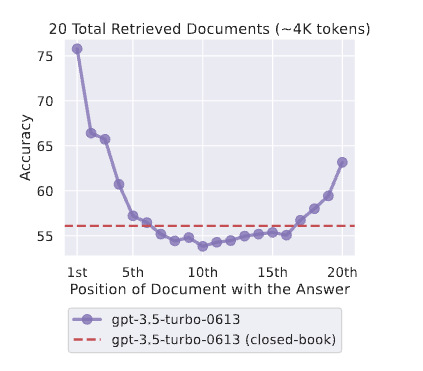

```python
def _litm_reordering(documents: List[Document]) -> List[Document]:
    """Lost in the middle reorder: the less relevant documents will be at the
    middle of the list and more relevant elements at beginning / end.
    See: https://arxiv.org/abs//2307.03172"""

    documents.reverse()
    reordered_result = []
    for i, value in enumerate(documents):
        if i % 2 == 1:
            reordered_result.append(value)
        else:
            reordered_result.insert(0, value)
    return reordered_result
```



In [43]:
from langchain_community.document_transformers import LongContextReorder

# 덜 관련성 있는 문서는 리스트의 중간에 위치하고, 더 관련성 있는 문서는 리스트의 시작과 끝에 위치하게 됩니다.
reordering = LongContextReorder()
reordered_docs = reordering.transform_documents(fewshot_docs)

# 관련 문서가 리스트의 시작과 끝에 위치하는지 확인합니다.
for doc in reordered_docs:
  print(doc)

page_content='오아인은 네이버페이 결제 가능하고 예약 가능한 양식 레스토랑으로 톡톡 서비스를 제공합니다. '2만원대~ 가성비 와인샵'이라는 설명이 있고 광고 표시가 있습니다. 현재 영업 중이며 305개의 리뷰가 있고 '다양한 와인과 아름다운 인테리어의 조화'가 특징입니다.'
page_content='숙이네조개전골 서울대입구점은 조개요리 전문점으로 현재 영업 중입니다. 별점 4.62에 999개 이상의 리뷰가 있으며 TV프로그램 '식객남녀잘먹었습니다'에 소개되었습니다.' metadata={'relevance_score': -5.12109375}
page_content='애슐리퀸즈 서울대입구점은 예약 가능한 패밀리레스토랑으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 999개 이상의 리뷰가 있고 서울 관악구 봉천동에 위치해 있습니다.'
page_content='스테이크하우스 로아는 예약 가능한 양식 레스토랑으로 톡톡쿠폰이 있습니다. '에이드or하우스와인1잔무료! 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.66에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.' metadata={'relevance_score': -12.515625}


### 💫 Reranker

RAG 시스템에서, 검색기는 많은 문서 중에서 관련 문서를 빠르게 찾는 것을 목표로 합니다. 하지만 검색기는 주로 속도에 최적화되어 있어, 검색된 문서의 순위가 항상 최적이 아닐 수 있습니다. 여기서 reranker의 필요성이 생깁니다.

reranker는 더 강력한 모델을 사용하여 문서의 순위를 다시 매기는 방법입니다. 쿼리와 문서 간의 맥락을 더 깊이 고려하여 관련성 점수를 계산하기 때문에 관련 있는 문서를 훨씬 잘 찾아냅니다.

reranker에 대한 더 자세한 설명은 [이 문서](https://www.toolify.ai/ko/ai-news-kr/cohere-rag-rerankers-990927)에서 확인할 수 있습니다.

In [44]:
from langchain_nvidia_ai_endpoints import NVIDIARerank

reranker = NVIDIARerank(
    model=NIM_RERANKING_MODEL,
    api_key=NIM_API_KEY
)

# top_n: int = Field(5, ge=0, description="The number of documents to return.")
def rerank_docs(query, docs):
    reranked_docs = reranker.compress_documents(documents=docs, query=query)
    return reranked_docs

In [45]:
reranked_documents = rerank_docs(query=question, docs=fewshot_docs)
print("질문:", question)
for doc in reranked_documents:
    print(doc)

질문: 서울대 근처에서 티비에 방영된 적 있는 유명한 맛집을 알려줘.
page_content='숙이네조개전골 서울대입구점은 조개요리 전문점으로 현재 영업 중입니다. 별점 4.62에 999개 이상의 리뷰가 있으며 TV프로그램 '식객남녀잘먹었습니다'에 소개되었습니다.' metadata={'relevance_score': -5.12109375}
page_content='애슐리퀸즈 서울대입구점은 예약 가능한 패밀리레스토랑으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 999개 이상의 리뷰가 있고 서울 관악구 봉천동에 위치해 있습니다.' metadata={'relevance_score': -11.375}
page_content='스테이크하우스 로아는 예약 가능한 양식 레스토랑으로 톡톡쿠폰이 있습니다. '에이드or하우스와인1잔무료! 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.66에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.' metadata={'relevance_score': -12.515625}
page_content='오아인은 네이버페이 결제 가능하고 예약 가능한 양식 레스토랑으로 톡톡 서비스를 제공합니다. '2만원대~ 가성비 와인샵'이라는 설명이 있고 광고 표시가 있습니다. 현재 영업 중이며 305개의 리뷰가 있고 '다양한 와인과 아름다운 인테리어의 조화'가 특징입니다.' metadata={'relevance_score': -17.0625}


In [46]:
for doc in fewshot_docs:
  print(doc)

page_content='스테이크하우스 로아는 예약 가능한 양식 레스토랑으로 톡톡쿠폰이 있습니다. '에이드or하우스와인1잔무료! 쿠폰'을 제공하며 현재 영업 중입니다. 별점 4.66에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.' metadata={'relevance_score': -12.515625}
page_content='오아인은 네이버페이 결제 가능하고 예약 가능한 양식 레스토랑으로 톡톡 서비스를 제공합니다. '2만원대~ 가성비 와인샵'이라는 설명이 있고 광고 표시가 있습니다. 현재 영업 중이며 305개의 리뷰가 있고 '다양한 와인과 아름다운 인테리어의 조화'가 특징입니다.' metadata={'relevance_score': -17.0625}
page_content='애슐리퀸즈 서울대입구점은 예약 가능한 패밀리레스토랑으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 999개 이상의 리뷰가 있고 서울 관악구 봉천동에 위치해 있습니다.' metadata={'relevance_score': -11.375}
page_content='숙이네조개전골 서울대입구점은 조개요리 전문점으로 현재 영업 중입니다. 별점 4.62에 999개 이상의 리뷰가 있으며 TV프로그램 '식객남녀잘먹었습니다'에 소개되었습니다.' metadata={'relevance_score': -5.12109375}


### 🤝 [Ensemble Retriever (hybrid search)](https://python.langchain.com/v0.2/docs/how_to/ensemble_retriever/)

EnsembleRetriever는 여러 검색기의 결과를 하나로 통합해 제공합니다. 이 검색기는 다양한 검색기의 결과를 [RRF(Reciprocal Rank Fusion) 알고리즘](https://learn.microsoft.com/ko-kr/azure/search/hybrid-search-ranking)을 통해 재정렬합니다. 이 방식은 각각의 검색기의 특성을 적절히 활용하여, 하나의 검색기만 사용할 때보다 뛰어난 성능을 발휘할 수 있습니다.

희소 검색기와 밀집 검색기는 각각 서로 다른 장점을 가지고 있기 때문에 많은 상황에서 조합하여 사용하고 있습니다. 희소 검색기는 키워드 기반으로 문서를 효과적으로 찾아내고, 밀집 검색기는 문서 간의 의미적 유사성을 파악하는 데 강점을 가집니다. 이러한 하이브리드 접근 방식은 검색 결과의 정확성과 품질을 크게 향상시킵니다.

In [47]:
from langchain.retrievers import EnsembleRetriever
from langchain_community.retrievers import BM25Retriever
from langchain_community.vectorstores import FAISS
from kiwipiepy import Kiwi

kiwi = Kiwi()
text_docs = [doc.page_content for doc in documents]

def preprocessing_with_kiwi(text):
  return [t.form for t in kiwi.tokenize(text)]

# initialize the bm25 retriever and faiss retriever
bm25_retriever = BM25Retriever.from_texts(
    text_docs,
    metadatas=[{"source": 'bm25'}] * len(text_docs),
    preprocess_func=preprocessing_with_kiwi
)
bm25_retriever.k = 4


faiss_vectorstore = FAISS.from_texts(
    text_docs, embedding_model, metadatas=[{"source": 'faiss'}] * len(text_docs)
)
faiss_retriever = faiss_vectorstore.as_retriever(search_kwargs={"k": 4})

# initialize the ensemble retriever
ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, faiss_retriever], weights=[0.5, 0.5]
)

In [48]:
docs = ensemble_retriever.invoke("서울대 샤로수길에서 TV 프로그램에 소개된 맛있는 파스타 맛집 중 예약 가능한 곳 알려주세요.")
for doc in docs:
    print(doc.metadata, doc)

{'source': 'bm25'} page_content='빠레뜨한남 샤로수길점은 예약 가능한 양식 레스토랑으로 현재 영업 중입니다. 별점 4.49에 999개 이상의 리뷰가 있습니다.' metadata={'source': 'bm25'}
{'source': 'bm25'} page_content='쥬벤쿠바 서울대입구점은 예약 가능한 양식 레스토랑으로 현재 영업 중입니다. 별점 4.68에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.' metadata={'source': 'bm25'}
{'source': 'faiss'} page_content='오늘그대와 샤로수길점은 예약 가능한 스파게티, 파스타전문점으로 쿠폰이 있습니다. '네이버 예약시 5% 할인 쿠폰'을 제공하며 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 '맛있는 라구 파스타와 풍성한 양의 조화'가 특징입니다.' metadata={'source': 'faiss'}
{'source': 'bm25'} page_content='키라키라윤 샤로수길점은 예약 가능한 요리주점으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 905개의 리뷰가 있고 '맛있는 스끼야끼의 깊은 맛'이 특징입니다.' metadata={'source': 'bm25'}
{'source': 'faiss'} page_content='파앤피파스타하우스 샤로수길점은 예약 가능한 이탈리아음식점으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 999개 이상의 리뷰가 있고 '좋은 분위기와 맛있는 파스타의 조화'가 특징입니다.' metadata={'source': 'faiss'}
{'source': 'bm25'} page_content='안녕부산은 한식 전문점으로 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.복희떡볶이는 떡볶이 전문점으로 현재 영업 중입니다. 428개의 리뷰가 있으며 '감칠맛 풍부한 소스가 더해진 맛있는 즉석 떡볶이'가 특징입니다.' metadata={'so

In [50]:
docs = ensemble_retriever.invoke("서울대 샤로수길에서 티비에 소개된 맛있는 파스타 맛집 중 예약 가능한 곳 알려주세요.")
for doc in docs:
    print(doc.metadata, doc)

{'source': 'bm25'} page_content='빠레뜨한남 샤로수길점은 예약 가능한 양식 레스토랑으로 현재 영업 중입니다. 별점 4.49에 999개 이상의 리뷰가 있습니다.' metadata={'source': 'bm25'}
{'source': 'bm25'} page_content='파앤피파스타하우스 샤로수길점은 예약 가능한 이탈리아음식점으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 999개 이상의 리뷰가 있고 '좋은 분위기와 맛있는 파스타의 조화'가 특징입니다.' metadata={'source': 'bm25'}
{'source': 'faiss'} page_content='오늘그대와 샤로수길점은 예약 가능한 스파게티, 파스타전문점으로 쿠폰이 있습니다. '네이버 예약시 5% 할인 쿠폰'을 제공하며 현재 영업 중입니다. 999개 이상의 리뷰가 있으며 '맛있는 라구 파스타와 풍성한 양의 조화'가 특징입니다.' metadata={'source': 'faiss'}
{'source': 'bm25'} page_content='키라키라윤 샤로수길점은 예약 가능한 요리주점으로 톡톡 서비스를 제공합니다. 현재 영업 중이며 905개의 리뷰가 있고 '맛있는 스끼야끼의 깊은 맛'이 특징입니다.' metadata={'source': 'bm25'}
{'source': 'bm25'} page_content='더 다이닝 로아는 예약 가능한 양식 레스토랑으로 톡톡쿠폰이 있습니다. '에이드or주류(택1)1잔무료 쿠폰'을 제공하며 현재 영업 중입니다. 999개 이상의 리뷰가 있고 서울 관악구 봉천동에 위치해 있습니다.' metadata={'source': 'bm25'}
{'source': 'faiss'} page_content='쥬벤쿠바 서울대입구점은 예약 가능한 양식 레스토랑으로 현재 영업 중입니다. 별점 4.68에 999개 이상의 리뷰가 있으며 TV프로그램 '생방송투데이'에 소개되었습니다.' metadata={'source': 'faiss'}


#### 🥝 Kiwi 토크나이저

In [51]:
#def default_preprocessing_func(text: str) -> List[str]:
#    return text.split()

"서울대 샤로수길에서 파스타 맛집 중 예약 가능한 곳 알려주세요.".split()

['서울대', '샤로수길에서', '파스타', '맛집', '중', '예약', '가능한', '곳', '알려주세요.']

In [53]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
kiwi.tokenize("서울대 샤로수길에서 파스타 맛집 중 예약 가능한 곳 알려주세요.")

[Token(form='서울대', tag='NNP', start=0, len=3),
 Token(form='샤로수', tag='NNG', start=4, len=3),
 Token(form='길', tag='NNG', start=7, len=1),
 Token(form='에서', tag='JKB', start=8, len=2),
 Token(form='파스타', tag='NNG', start=11, len=3),
 Token(form='맛집', tag='NNG', start=15, len=2),
 Token(form='중', tag='NNB', start=18, len=1),
 Token(form='예약', tag='NNG', start=20, len=2),
 Token(form='가능', tag='NNG', start=23, len=2),
 Token(form='하', tag='XSA', start=25, len=1),
 Token(form='ᆫ', tag='ETM', start=25, len=1),
 Token(form='곳', tag='NNB', start=27, len=1),
 Token(form='알리', tag='VV', start=29, len=2),
 Token(form='어', tag='EC', start=30, len=1),
 Token(form='주', tag='VX', start=31, len=1),
 Token(form='세요', tag='EF', start=32, len=2),
 Token(form='.', tag='SF', start=34, len=1)]

### 🔦 [Metadata Filtering with FAISS](https://python.langchain.com/docs/how_to/MultiQueryRetriever/)

서울대 주변 레스토랑 데이터를 검색할 때, 단순한 텍스트 기반 검색만으로는 사용자의 다양한 요구사항을 충족시키기 어렵습니다. 별점, 리뷰 수, TV 프로그램 출연 여부, 영업 상태 등 풍부한 메타데이터를 활용하면 훨씬 더 정확하고 유용한 검색 결과를 제공할 수 있습니다.

예를 들어, "별점 4.5 이상이면서 현재 영업 중인 파스타 맛집"과 같은 복합 조건 검색이 가능해집니다. 이러한 메타데이터 필터링은 사용자 경험을 크게 향상시키고, 검색 결과의 정확도를 높여줍니다.

> 실습 과제: 레스토랑 데이터에서 이름, 카테고리, 별점, 리뷰 수, TV 출연 여부, 영업 상태 등의 메타데이터를 추출하여 구조화하고, FAISS 벡터 스토어의 필터링 기능을 활용해 다양한 조건 검색을 구현해보세요. 특히 앙상블 리트리버와 결합하여 키워드 검색, 의미 검색, 메타데이터 필터링의 장점을 모두 활용하는 방법을 탐색해보세요!

### 📚 학습 자료
#### 기초 자료
1. [RAG 101: 검색 증강 생성 파이프라인의 이해](https://developer.nvidia.com/ko-kr/blog/rag-101-demystifying-retrieval-augmented-generation-pipelines/)
2. [RAG 101: 검색 증강 생성 관련 질문과 답변](https://developer.nvidia.com/ko-kr/blog/rag-101-retrieval-augmented-generation-questions-answered/)

#### 심화 자료
1. [Agentic RAG](https://langchain-ai.github.io/langgraph/tutorials/rag/langgraph_agentic_rag/)
2. [Adaptive RAG](https://langchain-ai.github.io/langgraph/tutorials/rag/langgraph_adaptive_rag/)
3. [SQL Agent](https://langchain-ai.github.io/langgraph/tutorials/sql-agent/)

## 🧩 마무리

### 📄 일단 데이터부터

RAG 시스템을 사용할 때, 입력 데이터의 질이 결과의 질을 결정합니다. 만약 입력 데이터가 부정확하거나 관련성이 낮은 정보를 포함하고 있다면, 아무리 고급의 검색기를 사용한다 해도 생성된 결과는 만족스럽지 못할 것입니다. 다양한 검색 기법을 알아두는 것은 도움이 되지만, 데이터의 질을 높이는 것에 집중해보세요.

> 💡 TIP
- 메타데이터를 활용하여 원하는 문서를 보다 정확하게 검색해 보세요.
- 문서의 특성을 파악하여 적절한 사이즈로 청크를 나누어 성능을 개선해보세요.


### 💸 성능과 비용 사이에서

성능을 향상시키려는 모든 노력은 비용을 수반합니다. 예를 들어, Multi-Query나 Re-ranking 기술을 사용하면 검색 결과는 개선되지만, 첫 토큰을 받기까지의 시간이 길어질 수 있습니다.

대규모 시스템에서는 이러한 지연(latency)과 같은 추가 비용이 더욱 눈에 띄게 됩니다. 따라서 각 기능을 추가할 때는 그 기능이 실제로 사용자 경험을 얼마나 향상시키는지를 고려하여 비용 대비 효과를 신중하게 따져보아야 합니다.

실제 환경에서 성능을 테스트하여 그 가치를 확인하고, 이러한 도구들을 효과적으로 활용하여 사용자 경험을 개선해 보세요.

*잘못된 내용이 있거나, 추가적인 질문이 있다면 언제든지 연락주세요! 네트워킹도 환영합니다. 🤗*
- 이름: 김하림
- 이메일 주소: harheem@gsneotek.com
- LinkedIn: https://www.linkedin.com/in/harheemk/